In [1]:
#notebook copied from
#https://www.kaggle.com/code/ncsaayali/bert-qa-model-with-text-summarization#Data-Visualization
#this notebook helped me get preliminary analysis to further analyze
#although this notebook does do Bert model I preferred sklearn as source is easily available from sklearn
## Import all required libraries
import numpy as np 
import pandas as pd 
import json
import os
from tqdm import tqdm,tqdm_notebook
import gc

In [ ]:
path_to_json = 'G:/document_parses/pdf_json'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]


In [ ]:

jsons_data = pd.DataFrame(columns=['paper_id', 'abstract', 'body_text'])

id2abstract = []
# we need both the json and an index number so use enumerate()
for index, js in enumerate(json_files[:1000]):     #memory reasons 1000
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        
        paper_id = json_text['paper_id']

        abstract=''
        for entry in json_text['abstract']:
                abstract += entry['text']
        id2abstract.append({paper_id:abstract})
               
        body_text=""
        for entry in json_text['body_text']:
                body_text += entry['text']
                
                
        
        jsons_data.loc[index] = [paper_id, abstract, body_text]


print(jsons_data)

In [63]:
jsons_data.describe()

,paper_id,abstract,body_text
count,1000,1000,1000
unique,1000,669,1000
top,0000028b5cc154f68b8a269f6578f21e31f62977,,According to current live statistics at the ti...
freq,1,332,1


In [64]:
jsons_data['abstract_word_count'] = jsons_data['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
jsons_data['body_word_count'] = jsons_data['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
jsons_data['body_unique_words']=jsons_data['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
jsons_data.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,0000028b5cc154f68b8a269f6578f21e31f62977,,According to current live statistics at the ti...,0,623,349
1,0000b6da665726420ab8ac9246d526f2f44d5943,Objective: An at home-test for differentiating...,As a consequence of the global COVID-19 pandem...,262,1044,554
2,0000b93c66f991236db92dc16fa6db119b27ca12,,Infections are an important cause of morbidity...,0,6781,2245
3,0000fcce604204b1b9d876dc073eb529eb5ce305,Contribución de los autores: Rocío Menéndez Co...,Se calcula que en España existen cerca de 367....,401,4965,1660
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,Introduction and objectives: The COVID-19 outb...,Introduction and objectives: The COVID-19 outb...,286,3482,1296


In [67]:
for col in jsons_data.columns:
    print(col, jsons_data[col].isnull().sum())

paper_id 0
abstract 0
body_text 0
abstract_word_count 0
body_word_count 0
body_unique_words 0


In [71]:
jsons_data.drop(jsons_data.index[jsons_data['abstract_word_count'] == 0], inplace = True)
jsons_data.drop(jsons_data.index[jsons_data['body_word_count'] == 0], inplace = True)

jsons_data

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,0000b6da665726420ab8ac9246d526f2f44d5943,Objective: An at home-test for differentiating...,As a consequence of the global COVID-19 pandem...,262,1044,554
3,0000fcce604204b1b9d876dc073eb529eb5ce305,Contribución de los autores: Rocío Menéndez Co...,Se calcula que en España existen cerca de 367....,401,4965,1660
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,Introduction and objectives: The COVID-19 outb...,Introduction and objectives: The COVID-19 outb...,286,3482,1296
5,00013062c83cef3b89e6c5363ea4398571000905,Systems serology provides a broad view of humo...,"Whether during a natural infection, therapeuti...",173,7266,2067
6,00013694fb8095bb818b64346f791a5419d97c88,Prolonged Covid-19-related school closures in ...,"On 18th March 2020, faced with the threat of t...",200,7772,2259
...,...,...,...,...,...,...
993,00a7bf33f2f32b3e1f23a984f1c7185f805a4fec,With the emergence of more transmissible SARS-...,in Alberta) than those with wild-type SARS-CoV...,72,1831,671
994,00a7e4121de0d71d5357b99c51e866e254840bc9,The aim of the current study was to identify d...,The response to the COVID-19 pandemic has led ...,195,3407,1187
995,00a7f27b53bbb42854523c645e81534c04ef421c,To analyze the health-related quality of life ...,"Renal transplantation, hemodialysis (HD) and p...",408,2643,991
997,00a81cd5730114b23206cabe550df34381bf0a89,Die Therapie bei diabetischer sensomotorischer...,Die diabetische sensomotorische Polyneuropathi...,55,991,526


In [73]:
# Converting strings to Lower case
jsons_data["abstract"] = jsons_data["abstract"].str.lower() 
jsons_data["body_text"] = jsons_data["body_text"].str.lower() 
jsons_data.head(10)

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,0000b6da665726420ab8ac9246d526f2f44d5943,objective: an at home-test for differentiating...,as a consequence of the global covid-19 pandem...,262,1044,554
3,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores: rocío menéndez co...,se calcula que en españa existen cerca de 367....,401,4965,1660
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction and objectives: the covid-19 outb...,introduction and objectives: the covid-19 outb...,286,3482,1296
5,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides a broad view of humo...,"whether during a natural infection, therapeuti...",173,7266,2067
6,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid-19-related school closures in ...,"on 18th march 2020, faced with the threat of t...",200,7772,2259
7,0001418189999fea7f7cbe3e82703d71c85a6fe5,feline infectious peritonitis virus (fipv) pos...,feline infectious peritonitis (fip) is a fatal...,164,2049,763
8,000159d40045de3f55c9ddd5d99d760d679d4910,"the cctv surveillance center (below to ""center...",the 4th industrial revolution technology is be...,148,1964,699
10,0001731462dcd83c5c547774a37071e5cbf981a2,as one of the frontline professionals during t...,the world is currently struggling with the cor...,207,3477,1189
11,0001bbba65c675eb2c0b1ecea737ac065d7124e1,opinion palliative care in daisy j.a. janssen ...,"since the start of the covid-19 pandemic, mill...",195,2471,932
12,000209cd97f65eb8cf1b2ac1d62df2d87c7ac9a2,"nevertheless, increasing the self-responsibili...",introduction: personalized medicine and manage...,53,9154,2181


In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
stopwords_custom = nltk.corpus.stopwords.words('english')
customize_stop_words = ['common','review','describes','abstract','retrospective','chart','patients','study','may',
                        'associated','results','including','high''found','one','well','among','Abstract','provide',
                        'objective','objective:','background','range','features','participates','doi', 'preprint', 
                        'copyright', 'org', 'https', 'et ','et' 'al', 'author', 'figure', 'table', 'rights', 'reserved', 
                        'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 
                        'Elsevier', 'PMC', 'CZI']
### append custom stopwords to default stopwords from NLTK
for i in customize_stop_words:
    stopwords_custom.append(i)

In [76]:
jsons_data['abstract'] = jsons_data['abstract'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
jsons_data['body_text'] = jsons_data['body_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
jsons_data

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,0000b6da665726420ab8ac9246d526f2f44d5943,home-test differentiating conductive sensorine...,"consequence global covid-19 pandemic, accelera...",262,1044,554
3,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores: rocío menéndez co...,se calcula que en españa existen cerca de 367....,401,4965,1660
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives: covid-19 outbreak unc...,introduction objectives: covid-19 outbreak unc...,286,3482,1296
5,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides broad view humoral i...,"whether natural infection, therapeutic vaccina...",173,7266,2067
6,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid-19-related school closures uk ...,"18th march 2020, faced threat covid-19 pandemi...",200,7772,2259
...,...,...,...,...,...,...
993,00a7bf33f2f32b3e1f23a984f1c7185f805a4fec,emergence transmissible sars-cov-2 variants co...,alberta) wild-type sars-cov-2 infections timef...,72,1831,671
994,00a7e4121de0d71d5357b99c51e866e254840bc9,aim current identify difficulties adapting nor...,response covid-19 pandemic led unprecedented s...,195,3407,1187
995,00a7f27b53bbb42854523c645e81534c04ef421c,analyze health-related quality life conversion...,"renal transplantation, hemodialysis (hd) perit...",408,2643,991
997,00a81cd5730114b23206cabe550df34381bf0a89,die therapie bei diabetischer sensomotorischer...,die diabetische sensomotorische polyneuropathi...,55,991,526


In [77]:
!pip install contractions

In [78]:
import contractions
jsons_data['abstract'] = jsons_data['abstract'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
jsons_data['body_text'] = jsons_data['body_text'].apply(lambda x: " ".join([contractions.fix(word) for word in x.split()]))
jsons_data.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,0000b6da665726420ab8ac9246d526f2f44d5943,home-test differentiating conductive sensorine...,"consequence global covid-19 pandemic, accelera...",262,1044,554
3,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores: rocío menéndez co...,se calcula que en españa existen cerca de 367....,401,4965,1660
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives: covid-19 outbreak unc...,introduction objectives: covid-19 outbreak unc...,286,3482,1296
5,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides broad view humoral i...,"whether natural infection, therapeutic vaccina...",173,7266,2067
6,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid-19-related school closures uk ...,"18th march 2020, faced threat covid-19 pandemi...",200,7772,2259


In [79]:
from nltk.tokenize import RegexpTokenizer
tokenizer_pattern = RegexpTokenizer('\w+')
jsons_data['abstract'] = jsons_data['abstract'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
jsons_data['body_text'] = jsons_data['body_text'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
jsons_data

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,0000b6da665726420ab8ac9246d526f2f44d5943,home test differentiating conductive sensorine...,consequence global covid 19 pandemic accelerat...,262,1044,554
3,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocío menéndez col...,se calcula que en españa existen cerca de 367 ...,401,4965,1660
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,286,3482,1296
5,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides broad view humoral i...,whether natural infection therapeutic vaccinat...,173,7266,2067
6,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid 19 related school closures uk ...,18th march 2020 faced threat covid 19 pandemic...,200,7772,2259
...,...,...,...,...,...,...
993,00a7bf33f2f32b3e1f23a984f1c7185f805a4fec,emergence transmissible sars cov 2 variants co...,alberta wild type sars cov 2 infections timefr...,72,1831,671
994,00a7e4121de0d71d5357b99c51e866e254840bc9,aim current identify difficulties adapting nor...,response covid 19 pandemic led unprecedented s...,195,3407,1187
995,00a7f27b53bbb42854523c645e81534c04ef421c,analyze health related quality life conversion...,renal transplantation hemodialysis hd peritone...,408,2643,991
997,00a81cd5730114b23206cabe550df34381bf0a89,die therapie bei diabetischer sensomotorischer...,die diabetische sensomotorische polyneuropathi...,55,991,526


In [80]:
jsons_data = jsons_data.reset_index(drop=True)
jsons_data

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,0000b6da665726420ab8ac9246d526f2f44d5943,home test differentiating conductive sensorine...,consequence global covid 19 pandemic accelerat...,262,1044,554
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocío menéndez col...,se calcula que en españa existen cerca de 367 ...,401,4965,1660
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,286,3482,1296
3,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides broad view humoral i...,whether natural infection therapeutic vaccinat...,173,7266,2067
4,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid 19 related school closures uk ...,18th march 2020 faced threat covid 19 pandemic...,200,7772,2259
...,...,...,...,...,...,...
663,00a7bf33f2f32b3e1f23a984f1c7185f805a4fec,emergence transmissible sars cov 2 variants co...,alberta wild type sars cov 2 infections timefr...,72,1831,671
664,00a7e4121de0d71d5357b99c51e866e254840bc9,aim current identify difficulties adapting nor...,response covid 19 pandemic led unprecedented s...,195,3407,1187
665,00a7f27b53bbb42854523c645e81534c04ef421c,analyze health related quality life conversion...,renal transplantation hemodialysis hd peritone...,408,2643,991
666,00a81cd5730114b23206cabe550df34381bf0a89,die therapie bei diabetischer sensomotorischer...,die diabetische sensomotorische polyneuropathi...,55,991,526


In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
!pip install wordcloud

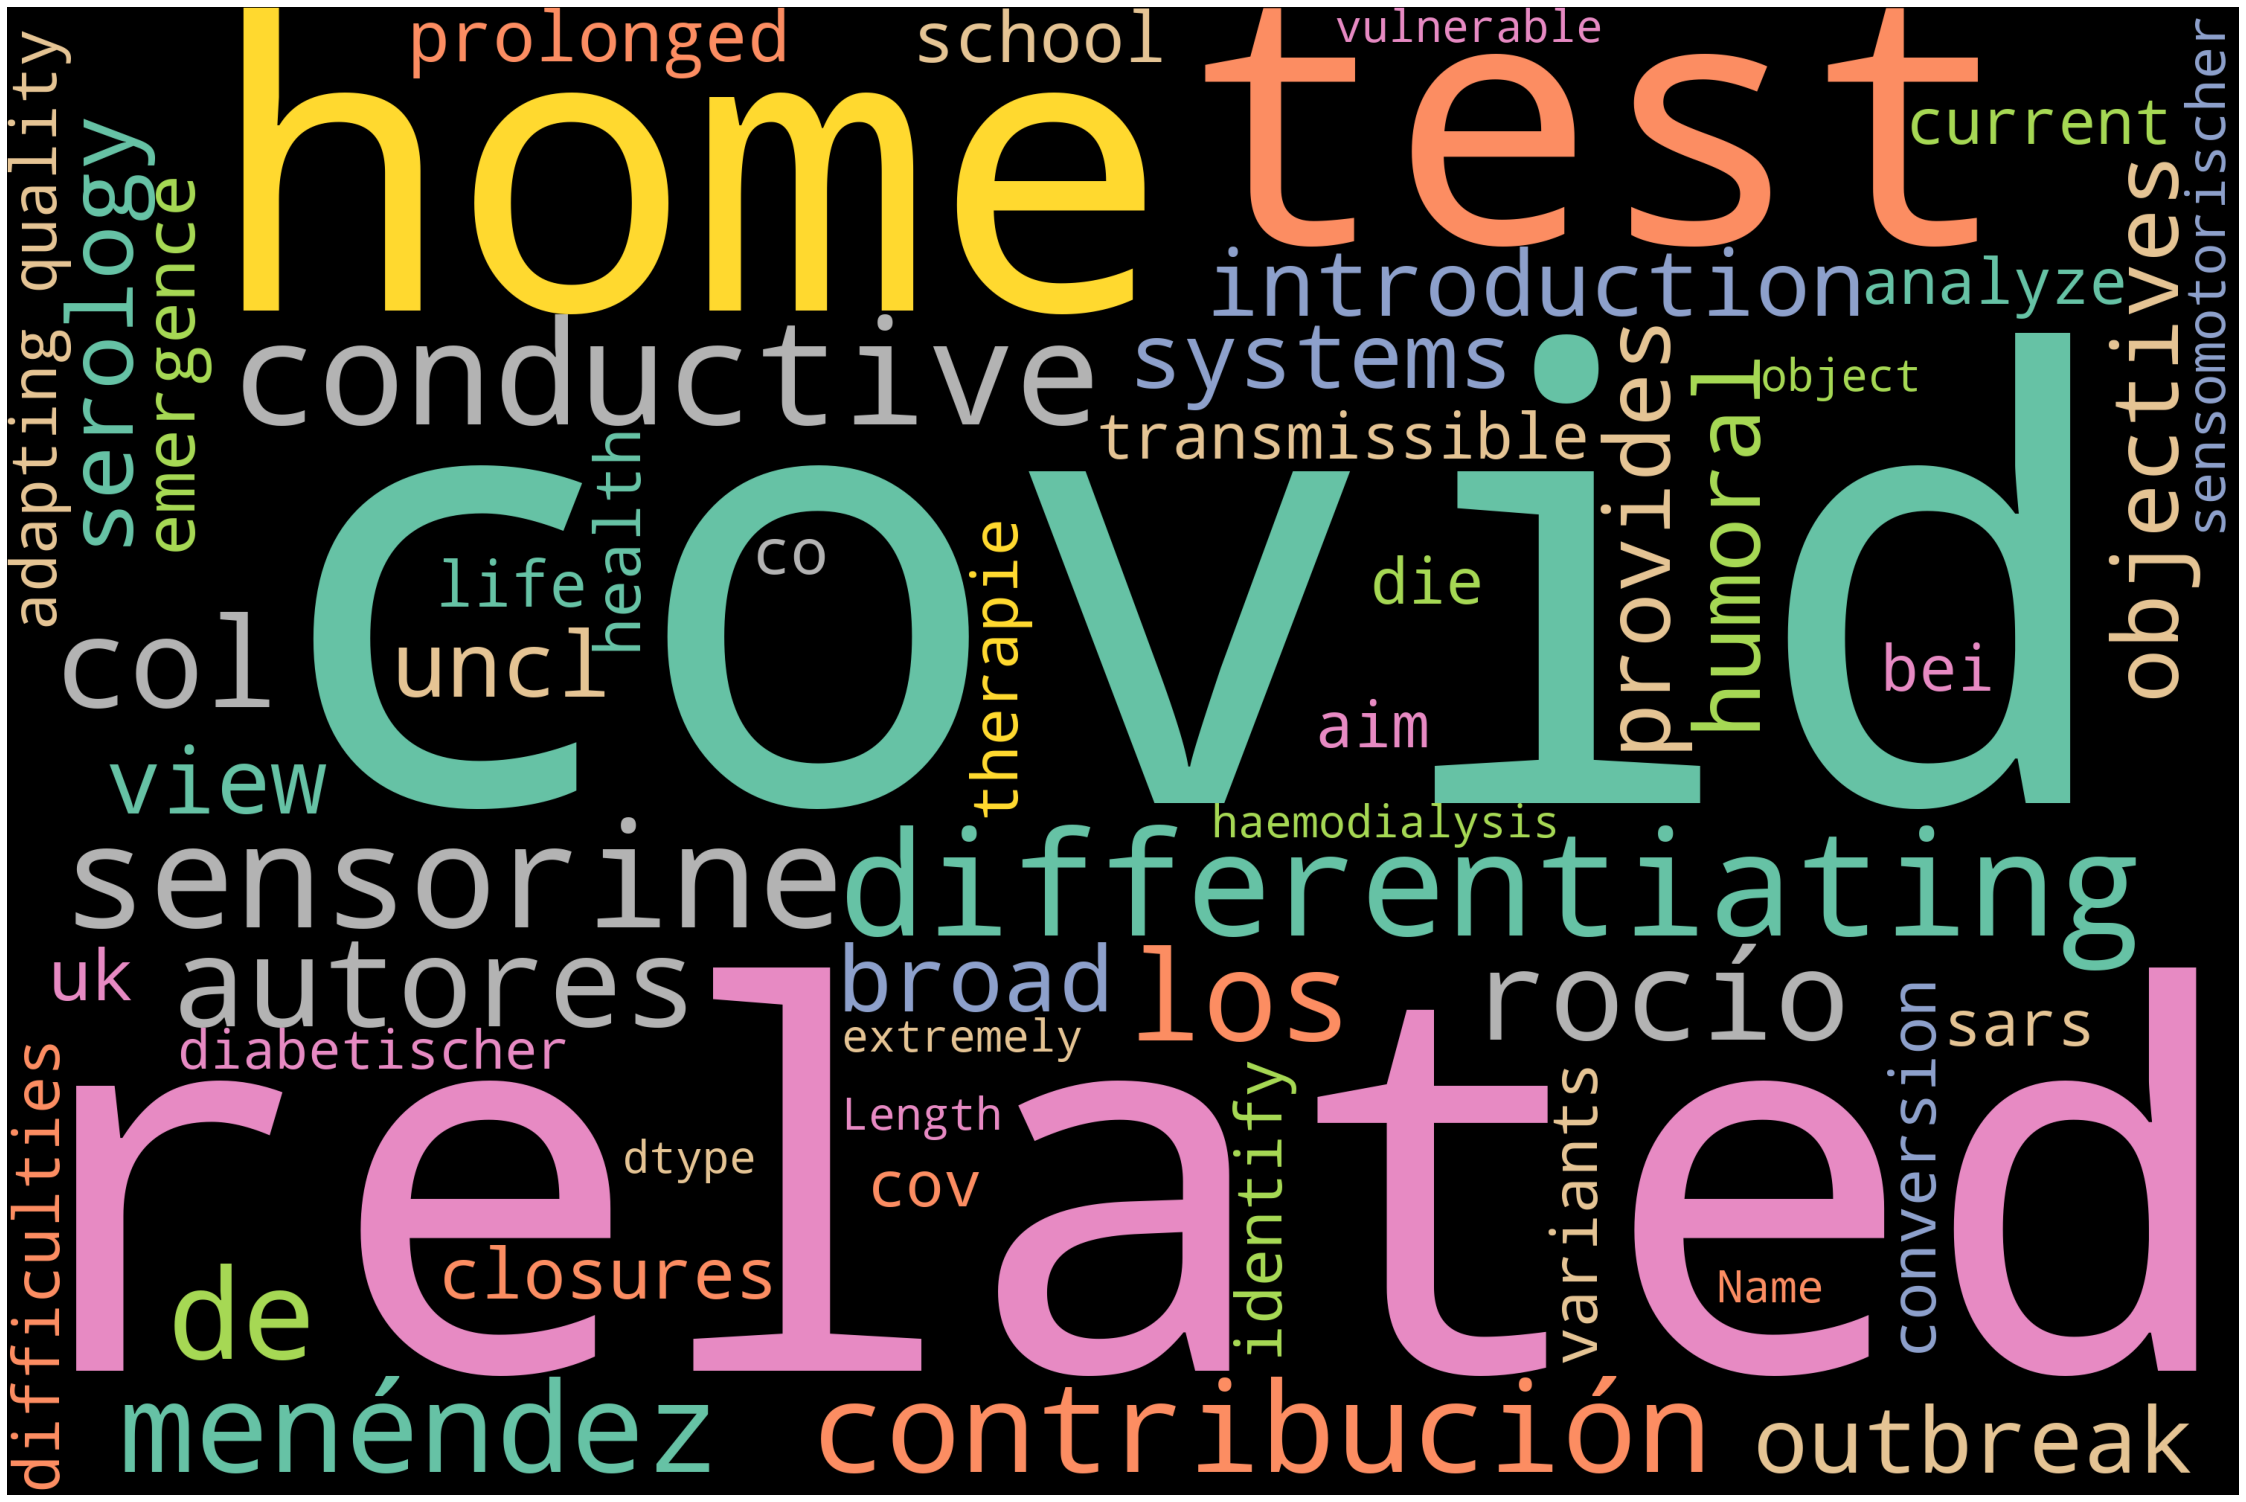

In [84]:
abstract_text = str(jsons_data.abstract)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(abstract_text)
# Plot
plot_cloud(wordcloud)

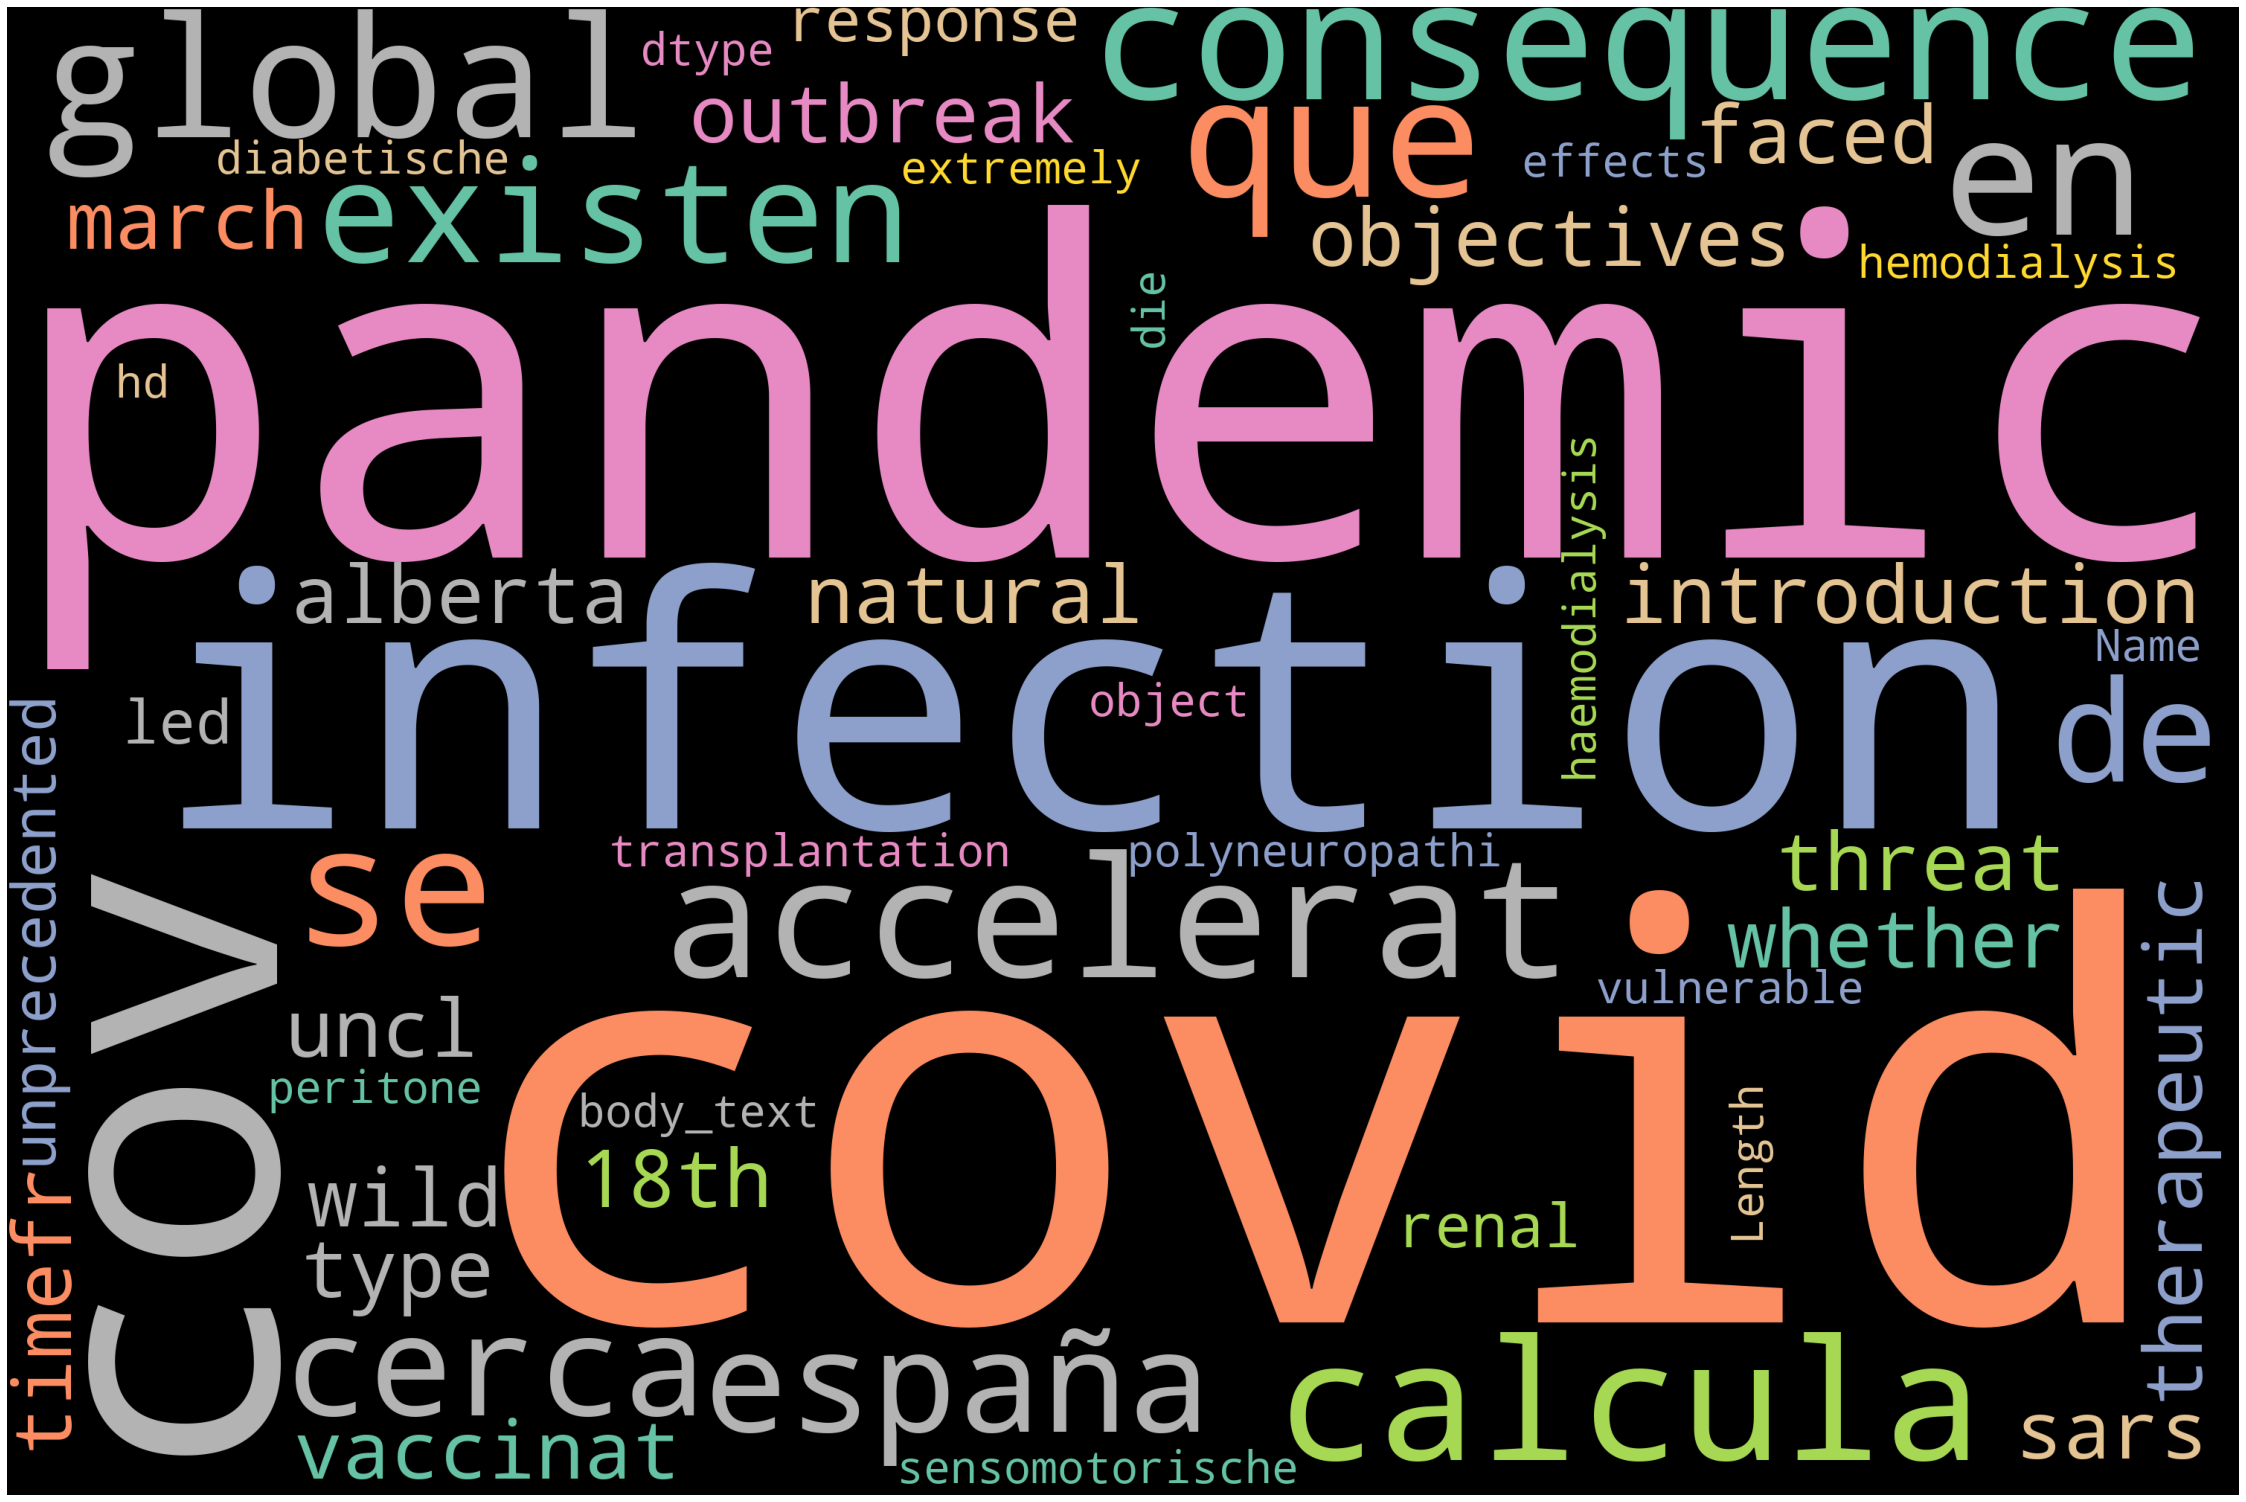

In [85]:
text = str(jsons_data.body_text)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(text)
# Plot
plot_cloud(wordcloud)

In [114]:
jsons_data

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,0000b6da665726420ab8ac9246d526f2f44d5943,home test differentiating conductive sensorine...,consequence global covid 19 pandemic accelerat...,262,1044,554
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocío menéndez col...,se calcula que en españa existen cerca de 367 ...,401,4965,1660
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,286,3482,1296
3,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides broad view humoral i...,whether natural infection therapeutic vaccinat...,173,7266,2067
4,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid 19 related school closures uk ...,18th march 2020 faced threat covid 19 pandemic...,200,7772,2259
...,...,...,...,...,...,...
663,00a7bf33f2f32b3e1f23a984f1c7185f805a4fec,emergence transmissible sars cov 2 variants co...,alberta wild type sars cov 2 infections timefr...,72,1831,671
664,00a7e4121de0d71d5357b99c51e866e254840bc9,aim current identify difficulties adapting nor...,response covid 19 pandemic led unprecedented s...,195,3407,1187
665,00a7f27b53bbb42854523c645e81534c04ef421c,analyze health related quality life conversion...,renal transplantation hemodialysis hd peritone...,408,2643,991
666,00a81cd5730114b23206cabe550df34381bf0a89,die therapie bei diabetischer sensomotorischer...,die diabetische sensomotorische polyneuropathi...,55,991,526


In [107]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [115]:
train_counts = count_vect.fit_transform(jsons_data['abstract'])

In [116]:
train_counts

<668x14731 sparse matrix of type '<class 'numpy.int64'>'
	with 69065 stored elements in Compressed Sparse Row format>

In [117]:
print(count_vect.vocabulary_.get(u'algorithm'))

1362


In [119]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(train_counts)
train_tf = tf_transformer.transform(train_counts)

In [120]:
train_tf.shape

(668, 14731)

In [163]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time
svd = TruncatedSVD(opts.n_components)

In [164]:
op = OptionParser()
op.add_option(
    "--lsa",
    dest="n_components",
    type="int",
    help="Preprocess documents with latent semantic analysis.",
)
op.add_option(
    "--no-minibatch",
    action="store_false",
    dest="minibatch",
    default=True,
    help="Use ordinary k-means algorithm (in batch mode).",
)
op.add_option(
    "--no-idf",
    action="store_false",
    dest="use_idf",
    default=True,
    help="Disable Inverse Document Frequency feature weighting.",
)
op.add_option(
    "--use-hashing",
    action="store_true",
    default=False,
    help="Use a hashing feature vectorizer",
)
op.add_option(
    "--n-features",
    type=int,
    default=10000,
    help="Maximum number of features (dimensions) to extract from text.",
)
op.add_option(
    "--verbose",
    action="store_true",
    dest="verbose",
    default=False,
    help="Print progress reports inside k-means algorithm.",
)

print(__doc__)
op.print_help()
print()


Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.



In [166]:
op.print_help()
print()

Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.



In [167]:
def is_interactive():
    return not hasattr(sys.modules["__main__"], "__file__")

argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)

In [168]:
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

In [169]:
print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(
            n_features=opts.n_features,
            stop_words="english",
            alternate_sign=False,
            norm=None,
        )
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(
            n_features=opts.n_features,
            stop_words="english",
            alternate_sign=False,
            norm="l2",
        )
else:
    vectorizer = TfidfVectorizer(
        max_df=0.5,
        max_features=opts.n_features,
        min_df=2,
        stop_words="english",
        use_idf=opts.use_idf,
    )

Extracting features from the training dataset using a sparse vectorizer


In [170]:
X = vectorizer.fit_transform(jsons_data['abstract'])
n_clust=5

In [171]:
if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print(
        "Explained variance of the SVD step: {}%".format(int(explained_variance * 100))
    )

    print()

In [172]:
if opts.minibatch:
    km = MiniBatchKMeans(
        n_clusters=n_clust,
        init="k-means++",
        n_init=1,
        init_size=1000,
        batch_size=1000,
        verbose=opts.verbose,
    )
else:
    km = KMeans(
        n_clusters=n_clust,
        init="k-means++",
        max_iter=100,
        n_init=1,
        verbose=opts.verbose,
    )

In [173]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("labels",km.labels_)

print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, km.labels_, sample_size=1000)

)
print()


Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=5, n_init=1,
                verbose=False)
done in 0.124s

labels [4 0 4 0 4 1 0 4 4 4 0 3 3 0 4 0 3 0 4 4 4 3 2 4 2 0 4 4 4 1 3 1 0 4 4 1 3
 4 4 4 2 3 2 4 0 0 4 1 0 4 0 4 2 4 3 0 3 3 1 0 0 4 2 4 4 0 0 0 3 4 0 4 1 4
 4 1 0 4 1 4 4 1 4 3 0 3 2 4 3 0 1 3 2 0 4 3 3 0 4 3 3 0 4 1 2 2 0 1 0 4 0
 3 1 3 3 4 3 4 0 3 0 0 0 4 0 0 0 4 1 4 4 4 2 4 3 1 0 0 4 2 1 4 3 1 3 0 3 4
 3 4 4 4 3 0 0 0 0 4 1 4 0 0 4 0 0 3 2 0 4 4 4 0 4 0 0 4 4 4 4 1 4 1 2 0 0
 1 0 0 0 0 4 3 0 3 4 1 4 4 0 4 4 0 4 4 3 0 2 4 4 3 1 4 3 0 1 4 1 3 0 3 0 4
 3 4 4 4 3 4 1 1 0 3 3 4 4 3 1 0 0 4 4 4 3 3 0 0 4 0 2 1 3 3 0 4 0 3 1 0 4
 4 3 2 4 1 0 0 0 0 1 4 0 3 4 4 4 0 4 4 4 4 4 4 3 3 4 4 3 0 3 0 0 4 4 0 4 0
 0 0 0 3 0 3 0 2 0 1 0 4 4 4 0 0 0 3 4 2 3 1 1 4 3 3 4 3 1 0 3 4 2 0 3 4 2
 4 1 2 3 0 4 4 4 0 1 3 0 4 0 0 2 3 0 0 0 0 4 3 4 4 3 0 4 4 0 2 0 3 3 0 4 3
 4 4 3 4 4 3 2 1 0 2 4 1 0 4 3 4 0 4 2 4 0 1 4 3 1 3 0 0 0 1 3 4 3 3 4 4 3
 4 2 3 4 0 0 0 0 0 0

In [174]:
if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(n_clust):
        print("Cluster %d:" % i, end="")
        for ind in order_centroids[i, :10]:
            print(" %s" % terms[ind], end="")
        print()

Top terms per cluster:
Cluster 0: data research model social paper based different method la health
Cluster 1: cells protein cell viral expression rna virus host viruses infection
Cluster 2: citation students education 2021 doi online https health et knowledge
Cluster 3: cov sars 19 covid coronavirus infection disease respiratory viral virus
Cluster 4: covid 19 health pandemic care risk 95 mortality ci children


In [155]:
#using same analysis on other aspects of jsons_data
jsons_data

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
0,0000b6da665726420ab8ac9246d526f2f44d5943,home test differentiating conductive sensorine...,consequence global covid 19 pandemic accelerat...,262,1044,554
1,0000fcce604204b1b9d876dc073eb529eb5ce305,contribución de los autores rocío menéndez col...,se calcula que en españa existen cerca de 367 ...,401,4965,1660
2,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,introduction objectives covid 19 outbreak uncl...,introduction objectives covid 19 outbreak uncl...,286,3482,1296
3,00013062c83cef3b89e6c5363ea4398571000905,systems serology provides broad view humoral i...,whether natural infection therapeutic vaccinat...,173,7266,2067
4,00013694fb8095bb818b64346f791a5419d97c88,prolonged covid 19 related school closures uk ...,18th march 2020 faced threat covid 19 pandemic...,200,7772,2259
...,...,...,...,...,...,...
663,00a7bf33f2f32b3e1f23a984f1c7185f805a4fec,emergence transmissible sars cov 2 variants co...,alberta wild type sars cov 2 infections timefr...,72,1831,671
664,00a7e4121de0d71d5357b99c51e866e254840bc9,aim current identify difficulties adapting nor...,response covid 19 pandemic led unprecedented s...,195,3407,1187
665,00a7f27b53bbb42854523c645e81534c04ef421c,analyze health related quality life conversion...,renal transplantation hemodialysis hd peritone...,408,2643,991
666,00a81cd5730114b23206cabe550df34381bf0a89,die therapie bei diabetischer sensomotorischer...,die diabetische sensomotorische polyneuropathi...,55,991,526


In [175]:
X = vectorizer.fit_transform(jsons_data['body_text'])
n_clust=5

In [177]:
if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print(
        "Explained variance of the SVD step: {}%".format(int(explained_variance * 100))
    )

    print()
if opts.minibatch:
    km = MiniBatchKMeans(
        n_clusters=n_clust,
        init="k-means++",
        n_init=1,
        init_size=1000,
        batch_size=1000,
        verbose=opts.verbose,
    )
else:
    km = KMeans(
        n_clusters=n_clust,
        init="k-means++",
        max_iter=100,
        n_init=1,
        verbose=opts.verbose,
    )
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("labels",km.labels_)

print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, km.labels_, sample_size=1000)

)
print()

Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=5, n_init=1,
                verbose=False)
done in 0.220s

labels [0 4 4 1 2 3 0 2 0 0 0 3 1 0 2 3 3 2 4 0 0 3 3 2 3 0 0 0 3 3 1 4 3 3 0 3 3
 3 3 0 2 3 2 3 0 3 2 3 0 3 0 0 2 0 4 4 3 3 3 3 0 0 3 4 1 0 0 1 1 2 3 3 3 3
 3 3 0 0 4 0 0 3 2 3 3 3 3 3 1 2 3 3 2 3 0 3 3 0 0 3 1 0 0 3 3 4 0 3 0 3 2
 3 4 1 3 3 1 0 0 3 0 0 0 4 0 0 3 4 1 0 0 0 0 3 3 4 0 0 0 0 3 3 3 3 3 0 1 3
 3 0 0 2 3 0 0 0 3 2 3 0 0 0 0 0 0 3 3 0 3 0 0 0 0 0 3 0 0 3 4 3 3 3 3 2 0
 3 0 0 0 0 3 1 3 3 2 3 0 4 3 0 3 0 0 4 1 0 2 0 3 1 3 0 3 3 3 0 4 3 0 3 0 3
 3 0 0 0 3 0 2 3 0 3 1 3 3 1 3 3 0 2 0 3 0 1 3 0 3 0 2 3 3 3 2 2 3 3 3 0 0
 3 1 2 2 3 3 0 2 2 3 0 0 4 0 0 2 3 0 3 3 2 0 2 3 3 0 2 1 0 1 4 4 0 0 0 1 0
 0 0 0 3 0 3 3 0 0 1 0 2 3 0 0 3 0 4 0 3 3 1 3 0 3 3 4 1 4 2 3 0 2 3 3 0 2
 3 3 2 3 3 0 4 0 2 3 1 3 3 0 0 3 3 3 0 0 0 2 4 3 0 1 3 0 3 0 0 0 3 4 0 0 3
 0 3 3 3 0 3 0 3 0 2 0 3 3 4 3 0 0 3 2 0 0 3 4 1 3 3 0 0 0 3 0 0 3 3 0 3 3
 0 2 1 2 0 0 0 0 0 0

In [178]:
if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(n_clust):
        print("Cluster %d:" % i, end="")
        for ind in order_centroids[i, :10]:
            print(" %s" % terms[ind], end="")
        print()

Top terms per cluster:
Cluster 0: social people public countries respondents al healthcare services children patient
Cluster 1: cov sars antibody rbd igg cells antibodies der protein die
Cluster 2: students al mental anxiety depression learning participants social women psychological
Cluster 3: cells cov sars viral cell protein rna treatment patient il
Cluster 4: influenza respiratory viruses viral children pcr bacterial rsv la infections


In [ ]:
#I used  5 clusters as guess one can use more or less dependednt on more reading into texts 